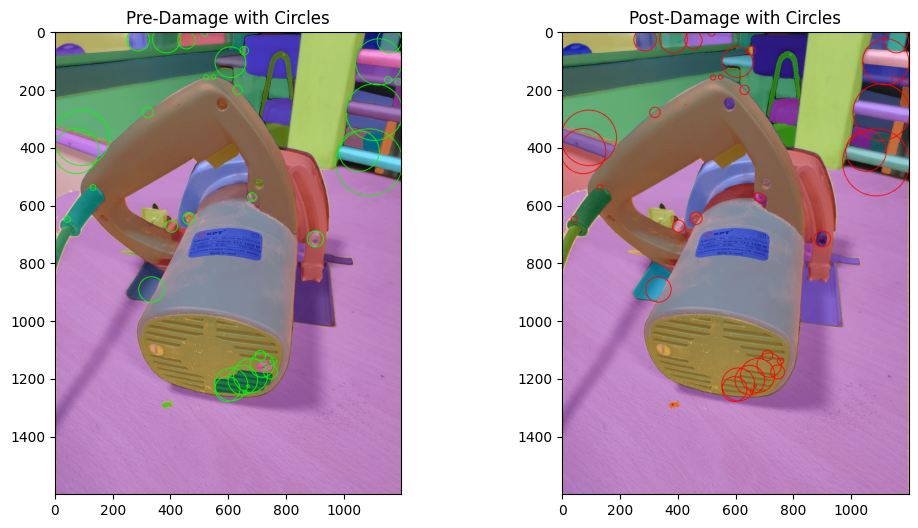

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load Images
pre_damage = cv2.imread("pre_wood.png", cv2.IMREAD_GRAYSCALE)
post_damage = cv2.imread("post_wood.png", cv2.IMREAD_GRAYSCALE)

# Step 2: Convert to Binary Masks
_, pre_mask = cv2.threshold(pre_damage, 127, 1, cv2.THRESH_BINARY)
_, post_mask = cv2.threshold(post_damage, 127, 1, cv2.THRESH_BINARY)

# Step 3: Compute Differences
difference = (post_mask - pre_mask).clip(0, 1)  # Highlight only new damages

# Step 4: Find Contours
contours, _ = cv2.findContours(difference.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Step 5: Load Original Images in Color for Visualization
pre_damage_color = cv2.imread("pre_wood.png")  # Pre-damage in color
post_damage_color = cv2.imread("post_wood.png")  # Post-damage in color

# Step 6: Draw Circles Around Detected Damage
for contour in contours:
    if cv2.contourArea(contour) > 10:  # Ignore small areas (noise)
        (x, y), radius = cv2.minEnclosingCircle(contour)
        center = (int(x), int(y))
        radius = int(radius)
        # Draw circle on pre-damage image
        cv2.circle(pre_damage_color, center, radius, (0, 255, 0), 2)  # Green for pre-damage
        # Draw circle on post-damage image
        cv2.circle(post_damage_color, center, radius, (0, 0, 255), 2)  # Red for post-damage

# Step 7: Display Results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Pre-Damage with Circles")
plt.imshow(cv2.cvtColor(pre_damage_color, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Post-Damage with Circles")
plt.imshow(cv2.cvtColor(post_damage_color, cv2.COLOR_BGR2RGB))
plt.show()

# Step 8: Save the Images (Optional)
cv2.imwrite("pre_damage_with_circles.png", pre_damage_color)
cv2.imwrite("post_damage_with_circles.png", post_damage_color)


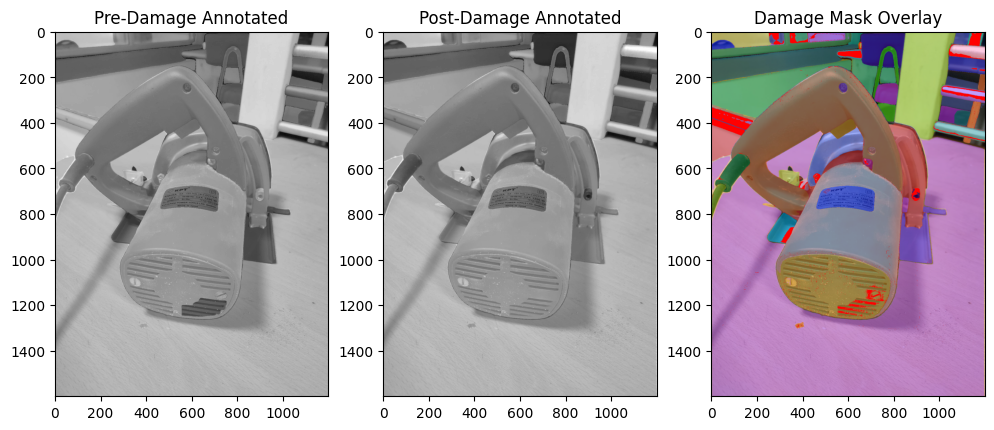

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load Images
pre_damage = cv2.imread("pre_wood.png", cv2.IMREAD_GRAYSCALE)
post_damage = cv2.imread("post_wood.png", cv2.IMREAD_GRAYSCALE)

# Step 2: Threshold to Create Binary Masks (if not already binary)
_, pre_mask = cv2.threshold(pre_damage, 127, 1, cv2.THRESH_BINARY)
_, post_mask = cv2.threshold(post_damage, 127, 1, cv2.THRESH_BINARY)

# Step 3: Compute the Damage Mask
damage_mask = (post_mask - pre_mask).clip(0, 1)  # Highlight only new damages

# Step 4: Overlay Damage Mask on Post-Damage Image
post_damage_color = cv2.imread("post_wood.png")  # Load post-damage image in color
damage_overlay = post_damage_color.copy()
damage_overlay[damage_mask == 1] = [0, 0, 255]  # Highlight damages in red

# Step 5: Display Results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Pre-Damage Annotated")
plt.imshow(pre_damage, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Post-Damage Annotated")
plt.imshow(post_damage, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Damage Mask Overlay")
plt.imshow(cv2.cvtColor(damage_overlay, cv2.COLOR_BGR2RGB))
plt.show()

# Step 6: Save the Damage Mask (Optional)
cv2.imwrite("damage_mask.png", (damage_mask * 255).astype(np.uint8))  # Save as a grayscale image


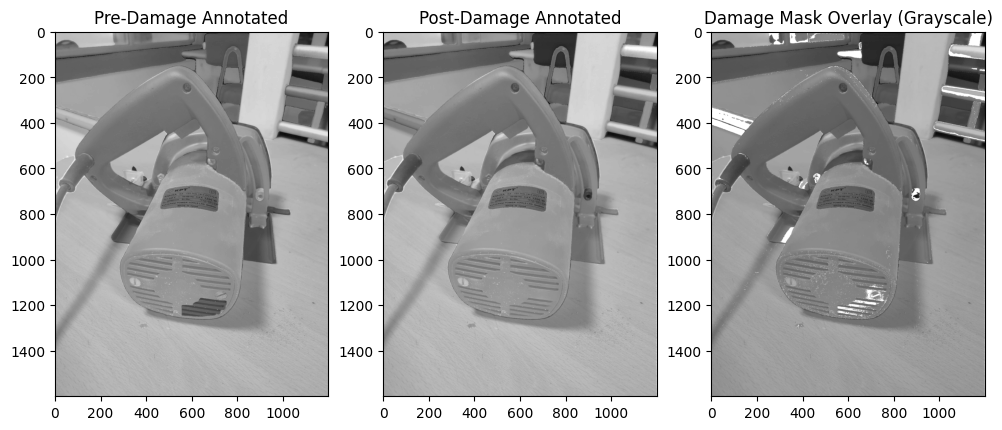

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load Images
pre_damage = cv2.imread("pre_wood.png", cv2.IMREAD_GRAYSCALE)
post_damage = cv2.imread("post_wood.png", cv2.IMREAD_GRAYSCALE)

# Step 2: Threshold to Create Binary Masks (if not already binary)
_, pre_mask = cv2.threshold(pre_damage, 127, 1, cv2.THRESH_BINARY)
_, post_mask = cv2.threshold(post_damage, 127, 1, cv2.THRESH_BINARY)

# Step 3: Compute the Damage Mask
damage_mask = (post_mask - pre_mask).clip(0, 1)  # Highlight only new damages

# Step 4: Create a Grayscale Damage Overlay (on post-damage grayscale image)
damage_overlay_grayscale = post_damage.copy()  # Copy the grayscale post-damage image
damage_overlay_grayscale[damage_mask == 1] = 255  # Set damage areas to white (255) on the grayscale image

# Step 5: Display Results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Pre-Damage Annotated")
plt.imshow(pre_damage, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Post-Damage Annotated")
plt.imshow(post_damage, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Damage Mask Overlay (Grayscale)")
plt.imshow(damage_overlay_grayscale, cmap='gray')
plt.show()

# Step 6: Save the Grayscale Damage Mask (Optional)
cv2.imwrite("damage_mask_grayscale.png", (damage_mask * 255).astype(np.uint8))  # Save as a grayscale image


In [ ]:
import os

CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")
print(CHECKPOINT_PATH, "; exist:", os.path.isfile(CHECKPOINT_PATH))

import torch

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"

mask_generator = SamAutomaticMaskGenerator(sam)

import os

# IMAGE_NAME = "/content/wood_cutter_backside_post.jpg"
# IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)
IMAGE_PATH="/content/wood_cutter_backside_post.jpg"


import cv2
import supervision as sv

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

sam_result = mask_generator.generate(image_rgb)


print(sam_result[0].keys())


mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)

detections = sv.Detections.from_sam(sam_result=sam_result)

annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)

cv2.imwrite('annotated_image.png', annotated_image)

NameError: name 'HOME' is not defined

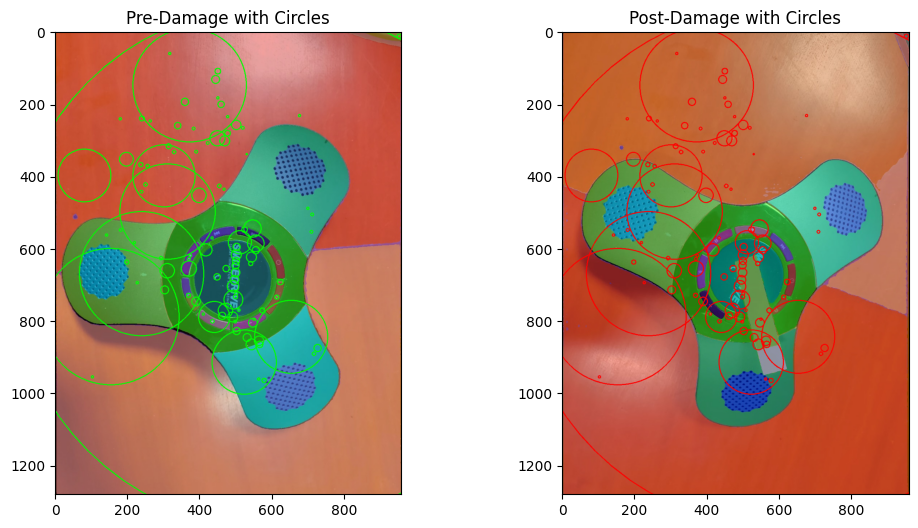

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load Images
pre_damage = cv2.imread("/content/pre_sym_anno.png", cv2.IMREAD_GRAYSCALE)
post_damage = cv2.imread("/content/post_sym_anno.png", cv2.IMREAD_GRAYSCALE)

# Step 2: Convert to Binary Masks
_, pre_mask = cv2.threshold(pre_damage, 127, 1, cv2.THRESH_BINARY)
_, post_mask = cv2.threshold(post_damage, 127, 1, cv2.THRESH_BINARY)

# Step 3: Compute Differences
difference = (post_mask - pre_mask).clip(0, 1)  # Highlight only new damages

# Step 4: Find Contours
contours, _ = cv2.findContours(difference.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Step 5: Load Original Images in Color for Visualization
pre_damage_color = cv2.imread("pre_sym_anno.png")  # Pre-damage in color
post_damage_color = cv2.imread("post_sym_anno.png")  # Post-damage in color

# Step 6: Draw Circles Around Detected Damage
for contour in contours:
    if cv2.contourArea(contour) > 10:  # Ignore small areas (noise)
        (x, y), radius = cv2.minEnclosingCircle(contour)
        center = (int(x), int(y))
        radius = int(radius)
        # Draw circle on pre-damage image
        cv2.circle(pre_damage_color, center, radius, (0, 255, 0), 2)  # Green for pre-damage
        # Draw circle on post-damage image
        cv2.circle(post_damage_color, center, radius, (0, 0, 255), 2)  # Red for post-damage

# Step 7: Display Results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Pre-Damage with Circles")
plt.imshow(cv2.cvtColor(pre_damage_color, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Post-Damage with Circles")
plt.imshow(cv2.cvtColor(post_damage_color, cv2.COLOR_BGR2RGB))
plt.show()

# Step 8: Save the Images (Optional)
cv2.imwrite("pre_damage_with_circles.png", pre_damage_color)
cv2.imwrite("post_damage_with_circles.png", post_damage_color)


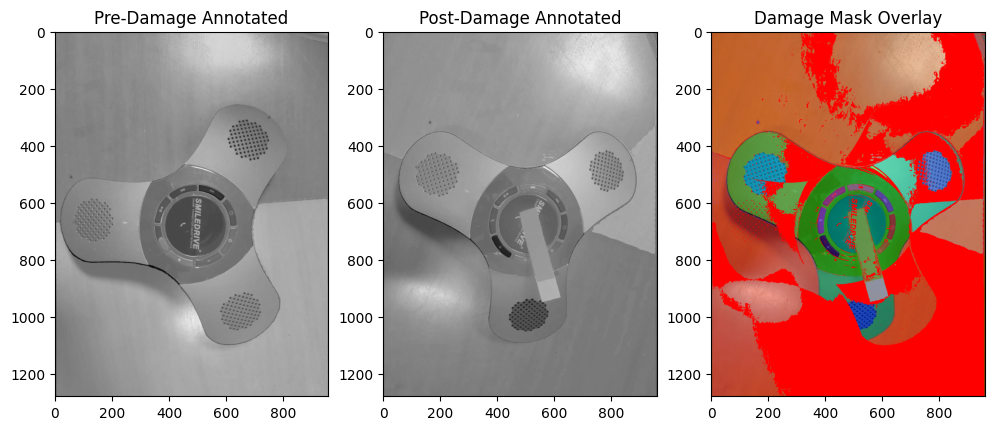

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load Images
pre_damage = cv2.imread("/content/pre_sym_anno.png", cv2.IMREAD_GRAYSCALE)
post_damage = cv2.imread("/content/post_sym_anno.png", cv2.IMREAD_GRAYSCALE)

# Step 2: Threshold to Create Binary Masks (if not already binary)
_, pre_mask = cv2.threshold(pre_damage, 127, 1, cv2.THRESH_BINARY)
_, post_mask = cv2.threshold(post_damage, 127, 1, cv2.THRESH_BINARY)

# Step 3: Compute the Damage Mask
damage_mask = (post_mask - pre_mask).clip(0, 1)  # Highlight only new damages

# Step 4: Overlay Damage Mask on Post-Damage Image
post_damage_color = cv2.imread("/content/post_sym_anno.png")  # Load post-damage image in color
damage_overlay = post_damage_color.copy()
damage_overlay[damage_mask == 1] = [0, 0, 255]  # Highlight damages in red

# Step 5: Display Results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Pre-Damage Annotated")
plt.imshow(pre_damage, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Post-Damage Annotated")
plt.imshow(post_damage, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Damage Mask Overlay")
plt.imshow(cv2.cvtColor(damage_overlay, cv2.COLOR_BGR2RGB))
plt.show()

# Step 6: Save the Damage Mask (Optional)
cv2.imwrite("damage_mask.png", (damage_mask * 255).astype(np.uint8))  # Save as a grayscale image


In [ ]:
def align_images_with_masks(image1, image2, mask1, mask2):
    # Find contours in masks
    contours1, _ = cv2.findContours(mask1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours2, _ = cv2.findContours(mask2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Choose the largest contour from both masks
    cnt1 = max(contours1, key=cv2.contourArea)
    cnt2 = max(contours2, key=cv2.contourArea)

    # Compute moments and centroids
    M1 = cv2.moments(cnt1)
    M2 = cv2.moments(cnt2)
    centroid1 = (int(M1["m10"] / M1["m00"]), int(M1["m01"] / M1["m00"]))
    centroid2 = (int(M2["m10"] / M2["m00"]), int(M2["m01"] / M2["m00"]))

    # Compute translation matrix
    tx = centroid1[0] - centroid2[0]
    ty = centroid1[1] - centroid2[1]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])

    # Align image2 to image1
    height, width= image1.shape
    aligned_image = cv2.warpAffine(image2, translation_matrix, (width, height))

    return aligned_image

# Example usage
aligned_post_damage_image = align_images_with_masks(
    pre_damage, post_damage, pre_mask, post_mask
)

# Visualize the aligned image
cv2.imshow("Aligned Image", aligned_post_damage_image)



DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


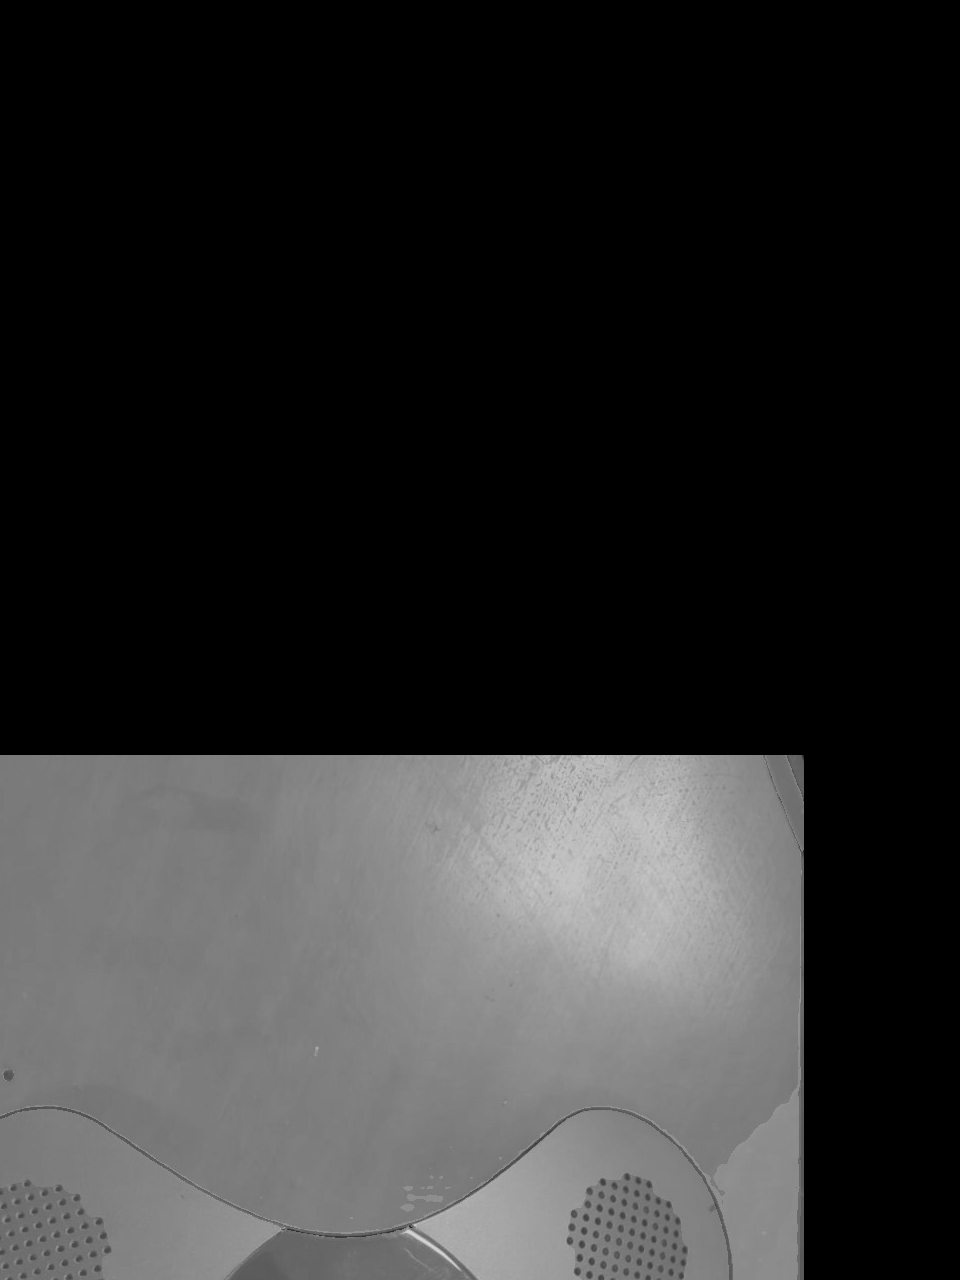

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

def align_images_with_masks(image1, image2, mask1, mask2):
    # Find contours in masks
    contours1, _ = cv2.findContours(mask1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours2, _ = cv2.findContours(mask2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Choose the largest contour from both masks
    cnt1 = max(contours1, key=cv2.contourArea)
    cnt2 = max(contours2, key=cv2.contourArea)

    # Compute moments and centroids
    M1 = cv2.moments(cnt1)
    M2 = cv2.moments(cnt2)
    centroid1 = (int(M1["m10"] / M1["m00"]), int(M1["m01"] / M1["m00"]))
    centroid2 = (int(M2["m10"] / M2["m00"]), int(M2["m01"] / M2["m00"]))

    # Compute translation matrix
    tx = centroid1[0] - centroid2[0]
    ty = centroid1[1] - centroid2[1]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])

    # Align image2 to image1
    height, width= image1.shape
    aligned_image = cv2.warpAffine(image2, translation_matrix, (width, height))

    return aligned_image

# Example usage
# Note that pre_damage, post_damage, pre_mask and post_mask are defined in previous cells, so they are still available
aligned_post_damage_image = align_images_with_masks(
    pre_damage, post_damage, pre_mask, post_mask
)

# Visualize the aligned image
cv2_imshow(aligned_post_damage_image) #Use cv2_imshow instead of cv2.imshow
# cv2.waitKey(0) # Not needed with cv2_imshow
# cv2.destroyAllWindows() # Not needed with cv2_imshow

In [ ]:
from google.colab import files  # Import for downloading in Colab

def align_images_with_masks(image1, image2, mask1, mask2):
    # Find contours in masks
    contours1, _ = cv2.findContours(mask1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours2, _ = cv2.findContours(mask2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Choose the largest contour from both masks
    cnt1 = max(contours1, key=cv2.contourArea)
    cnt2 = max(contours2, key=cv2.contourArea)

    # Compute moments and centroids
    M1 = cv2.moments(cnt1)
    M2 = cv2.moments(cnt2)
    centroid1 = (int(M1["m10"] / M1["m00"]), int(M1["m01"] / M1["m00"]))
    centroid2 = (int(M2["m10"] / M2["m00"]), int(M2["m01"] / M2["m00"]))

    # Compute translation matrix
    tx = centroid1[0] - centroid2[0]
    ty = centroid1[1] - centroid2[1]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])

    # Align image2 to image1
    height, width = image1.shape
    aligned_image = cv2.warpAffine(image2, translation_matrix, (width, height))

    # Save the aligned image
    output_filename = "aligned_post_damage_image.jpg"
    cv2.imwrite(output_filename, aligned_image)

    # Download the aligned image
    try:
        files.download(output_filename)
        print(f"Aligned image saved and downloaded as {output_filename}.")
    except:
        print(f"Aligned image saved locally as {output_filename} but could not be downloaded automatically.")

    return aligned_image

# Example usage
aligned_post_damage_image = align_images_with_masks(pre_damage, post_damage, pre_mask, post_mask)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Aligned image saved and downloaded as aligned_post_damage_image.jpg.


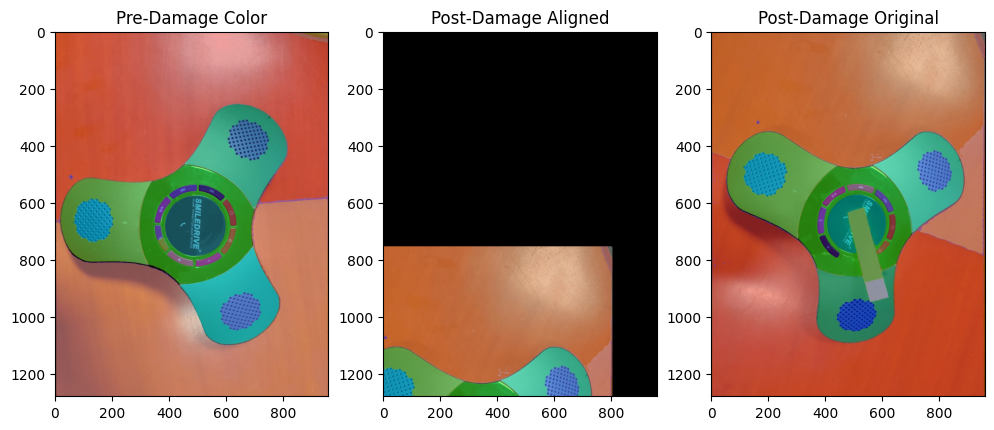

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load Images (color and grayscale separately)
pre_damage_color = cv2.imread("/content/pre_sym_anno.png", cv2.IMREAD_COLOR)  # Color image for alignment
post_damage_color = cv2.imread("/content/post_sym_anno.png", cv2.IMREAD_COLOR)  # Color image for alignment

pre_damage_gray = cv2.imread("/content/pre_sym_anno.png", cv2.IMREAD_GRAYSCALE)  # Grayscale for masks
post_damage_gray = cv2.imread("/content/post_sym_anno.png", cv2.IMREAD_GRAYSCALE)  # Grayscale for masks

# Step 2: Threshold to Create Binary Masks
_, pre_mask = cv2.threshold(pre_damage_gray, 127, 1, cv2.THRESH_BINARY)
_, post_mask = cv2.threshold(post_damage_gray, 127, 1, cv2.THRESH_BINARY)

# Step 3: Define the Alignment Function
def align_images_with_masks(image1, image2, mask1, mask2):
    # Find contours in masks
    contours1, _ = cv2.findContours(mask1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours2, _ = cv2.findContours(mask2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Choose the largest contour from both masks
    cnt1 = max(contours1, key=cv2.contourArea)
    cnt2 = max(contours2, key=cv2.contourArea)

    # Compute moments and centroids
    M1 = cv2.moments(cnt1)
    M2 = cv2.moments(cnt2)
    centroid1 = (int(M1["m10"] / M1["m00"]), int(M1["m01"] / M1["m00"]))
    centroid2 = (int(M2["m10"] / M2["m00"]), int(M2["m01"] / M2["m00"]))

    # Compute translation matrix
    tx = centroid1[0] - centroid2[0]
    ty = centroid1[1] - centroid2[1]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])

    # Align image2 to image1
    height, width, _ = image1.shape
    aligned_image = cv2.warpAffine(image2, translation_matrix, (width, height))

    return aligned_image

# Step 4: Call the Alignment Function
aligned_post_damage_color = align_images_with_masks(pre_damage_color, post_damage_color, pre_mask, post_mask)

# Step 5: Display Results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Pre-Damage Color")
plt.imshow(cv2.cvtColor(pre_damage_color, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title("Post-Damage Aligned")
plt.imshow(cv2.cvtColor(aligned_post_damage_color, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 3)
plt.title("Post-Damage Original")
plt.imshow(cv2.cvtColor(post_damage_color, cv2.COLOR_BGR2RGB))
plt.show()

# Step 6: Save the Aligned Image (Optional)
cv2.imwrite("aligned_post_damage.png", aligned_post_damage_color)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load Images (color and grayscale separately)
pre_damage_color = cv2.imread("/content/pre_sym_anno.png", cv2.IMREAD_COLOR)  # Color image for alignment
post_damage_color = cv2.imread("/content/post_sym_anno.png", cv2.IMREAD_COLOR)  # Color image for alignment

pre_damage_gray = cv2.imread("/content/pre_sym_anno.png", cv2.IMREAD_GRAYSCALE)  # Grayscale for masks
post_damage_gray = cv2.imread("/content/post_sym_anno.png", cv2.IMREAD_GRAYSCALE)  # Grayscale for masks

# Step 2: Threshold to Create Binary Masks
_, pre_binary_mask = cv2.threshold(pre_damage_gray, 127, 1, cv2.THRESH_BINARY)
_, post_binary_mask = cv2.threshold(post_damage_gray, 127, 1, cv2.THRESH_BINARY)

# Step 3: Create Color Masks from Binary Masks
pre_color_mask = cv2.merge([pre_binary_mask * 255] * 3)  # Convert single-channel to 3-channel
post_color_mask = cv2.merge([post_binary_mask * 255] * 3)  # Convert single-channel to 3-channel

# Step 4: Define the Flexible Alignment Function
def align_images_with_masks(image1, image2, mask1, mask2):
    """
    Align image2 to image1 using centroids from mask1 and mask2.

    Args:
        image1 (numpy.ndarray): First image (reference, pre-damage).
        image2 (numpy.ndarray): Second image (to be aligned, post-damage).
        mask1 (numpy.ndarray): Mask for the first image (binary or color).
        mask2 (numpy.ndarray): Mask for the second image (binary or color).

    Returns:
        numpy.ndarray: Aligned second image.
    """
    # Convert masks to grayscale if they are color masks
    if len(mask1.shape) == 3:
        mask1 = cv2.cvtColor(mask1, cv2.COLOR_BGR2GRAY)
    if len(mask2.shape) == 3:
        mask2 = cv2.cvtColor(mask2, cv2.COLOR_BGR2GRAY)

    # Find contours in masks
    contours1, _ = cv2.findContours(mask1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours2, _ = cv2.findContours(mask2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Choose the largest contour from both masks
    cnt1 = max(contours1, key=cv2.contourArea)
    cnt2 = max(contours2, key=cv2.contourArea)

    # Compute moments and centroids
    M1 = cv2.moments(cnt1)
    M2 = cv2.moments(cnt2)
    centroid1 = (int(M1["m10"] / M1["m00"]), int(M1["m01"] / M1["m00"]))
    centroid2 = (int(M2["m10"] / M2["m00"]), int(M2["m01"] / M2["m00"]))

    # Compute translation matrix
    tx = centroid1[0] - centroid2[0]
    ty = centroid1[1] - centroid2[1]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])

    # Align image2 to image1
    height, width, _ = image1.shape
    aligned_image = cv2.warpAffine(image2, translation_matrix, (width, height))

    return aligned_image

# Visualization Step (Optional)
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.title("Pre-Damage Binary Mask")
# plt.imshow(pre_binary_mask, cmap="gray")

# plt.subplot(1, 2, 2)
# plt.title("Post-Damage Binary Mask")
# plt.imshow(post_binary_mask, cmap="gray")

# plt.show()

# Save Masks (Optional)
cv2.imwrite("pre_binary_mask.png", pre_binary_mask * 255)  # Binary mask
cv2.imwrite("post_binary_mask.png", post_binary_mask * 255)  # Binary mask
cv2.imwrite("pre_color_mask.png", pre_color_mask)  # Color mask
cv2.imwrite("post_color_mask.png", post_color_mask)  # Color mask

# NOTE: Leave the function call to the user. Example below:
# aligned_post_damage = align_images_with_masks(pre_damage_color, post_damage_color, pre_binary_mask, post_binary_mask)
# OR
aligned_post_damage = align_images_with_masks(pre_damage_color, post_damage_color, pre_color_mask, post_color_mask)


In [ ]:
# Load images in color (unchanged)
pre_damage_color = cv2.imread("/content/pre_sym_anno.png", cv2.IMREAD_COLOR)
post_damage_color = cv2.imread("/content/post_sym_anno.png", cv2.IMREAD_COLOR)

# Create color masks (if not already prepared)
pre_mask_color = cv2.merge([cv2.threshold(pre_damage_color[:, :, 0], 127, 255, cv2.THRESH_BINARY)[1]] * 3)
post_mask_color = cv2.merge([cv2.threshold(post_damage_color[:, :, 0], 127, 255, cv2.THRESH_BINARY)[1]] * 3)


In [ ]:
import cv2
import numpy as np

def align_color_images_with_masks(image1, image2, mask1, mask2):
    """
    Aligns color image2 to color image1 using centroids from their corresponding color masks.

    Args:
        image1 (numpy.ndarray): First color image (reference, pre-damage).
        image2 (numpy.ndarray): Second color image (to be aligned, post-damage).
        mask1 (numpy.ndarray): Color mask for the first image.
        mask2 (numpy.ndarray): Color mask for the second image.

    Returns:
        numpy.ndarray: Aligned second color image.
    """
    # Convert color masks to grayscale
    mask1_gray = cv2.cvtColor(mask1, cv2.COLOR_BGR2GRAY)
    mask2_gray = cv2.cvtColor(mask2, cv2.COLOR_BGR2GRAY)

    # Find contours in masks
    contours1, _ = cv2.findContours(mask1_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours2, _ = cv2.findContours(mask2_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Choose the largest contour from both masks
    cnt1 = max(contours1, key=cv2.contourArea)
    cnt2 = max(contours2, key=cv2.contourArea)

    # Compute moments and centroids
    M1 = cv2.moments(cnt1)
    M2 = cv2.moments(cnt2)
    centroid1 = (int(M1["m10"] / M1["m00"]), int(M1["m01"] / M1["m00"]))
    centroid2 = (int(M2["m10"] / M2["m00"]), int(M2["m01"] / M2["m00"]))

    # Compute translation matrix
    tx = centroid1[0] - centroid2[0]
    ty = centroid1[1] - centroid2[1]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])

    # Align image2 to image1
    height, width, _ = image1.shape
    aligned_image = cv2.warpAffine(image2, translation_matrix, (width, height))

    return aligned_image


In [ ]:
aligned_post_damage = align_color_images_with_masks(pre_damage_color, post_damage_color, pre_mask_color, post_mask_color)


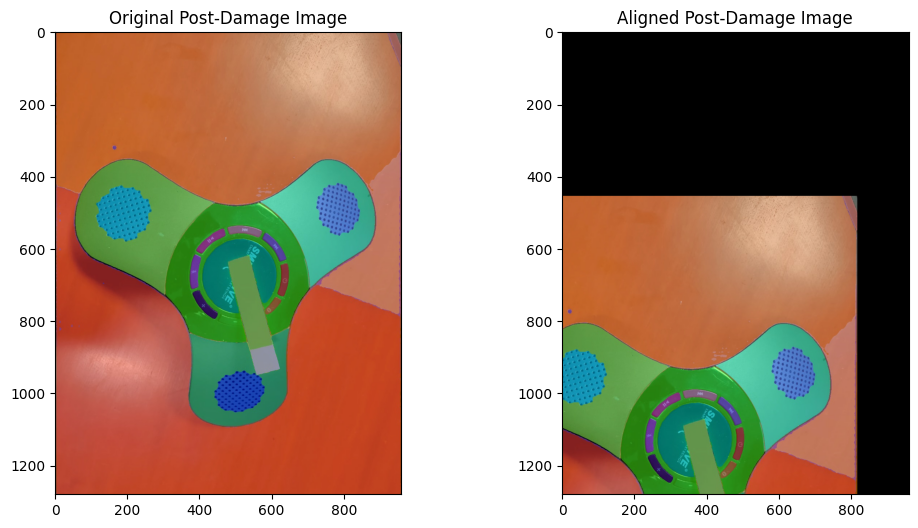

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Post-Damage Image")
plt.imshow(cv2.cvtColor(post_damage_color, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Aligned Post-Damage Image")
plt.imshow(cv2.cvtColor(aligned_post_damage, cv2.COLOR_BGR2RGB))
plt.show()
